# Lecture 1: Basic Structure of Neural Networks

> Link to site: https://rodolfoferro.xyz/ml4physicists/week-one/

## Homework

_The solutions will be briefly discussed in the online session for lecture 2. In order to follow the lecture series, please do at least two of these problems (the ones with the * are suggested)._

1. (\*) Implement a network that computes `XOR` (arbitrary number of hidden layers).
2. Implement a network that approximately computes `XOR`, with just 1 hidden layer 
  > Hint: there is something useful at the end of the "Visualization" notebook.
3. (\*) Visualize the results of intermediate layers in a multi-layer randomly initialized NN (meaning: take a fixed randomly initialized multi-layer network, and then throw away the layers above layer $n$; and directly connect layer $n$ to the output layer; see how results change when you vary $n$.
4. What happens when you change the spread of the random weights? Smart weight initialization is an important point for NN training.
5. Explore cases of curve fitting where there are several (non-equivalent) local minima. Is sampling noise helpful (i.e. the noise that comes about because of the small number of $x$ samples)?

## Solutions

For tasks 1 and 2, the code provided during the tutorial will be used, as it allows us to have control over the weights and biases since we can manipulate them by hand.

Also, a new implementation is added. I have created the object `NeuralNet` which integrates all the functions presented during the tutorial. The class can be found in the script [neural_net_01.py](!wget https://rodolfoferro.xyz/ml4physicists/scripts/neural_net_01.py).

I'll download and use the script directly to the notebook.

In [1]:
!wget https://rodolfoferro.xyz/ml4physicists/scripts/neural_net_01.py

--2020-04-29 21:57:40--  https://rodolfoferro.xyz/ml4physicists/scripts/neural_net_01.py
Resolving rodolfoferro.xyz (rodolfoferro.xyz)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to rodolfoferro.xyz (rodolfoferro.xyz)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9326 (9.1K) [application/octet-stream]
Saving to: ‘neural_net_01.py’

neural_net_01.py    100%[===================>]   9.11K  --.-KB/s    in 0s      

2020-04-29 21:57:40 (98.4 MB/s) - ‘neural_net_01.py’ saved [9326/9326]



In [0]:
import matplotlib.pyplot as plt
import numpy as np

from neural_net_01 import NeuralNet

### Task 1

> Implement a network that computes `XOR` (arbitrary number of hidden layers).

We will use our `NeuralNet` class to create a network with 2 hidden layers.

In [0]:
# We define weights
weights = [
    [
        [1.0, 0.0],     # Weights of 2 input neurons for 1st hidden neuron
        [0.0, -1.0],    # Weights of 2 input neurons for 2nd hidden neuron
        [-1.0, 0.0],    # Weights of 2 input neurons for 3rd hidden neuron
        [0.0, 1.0],     # Weights of 2 input neurons for 4th hidden neuron
    ],                
    [ 
        [1.0, 1.0, 0.0, 0.0],   # Weights of 4 hidden neurons for layer 2
        [0.0, 0.0, 1.0, 1.0],   # Weights of 4 hidden neurons for layer 2
    ],                
    [ 
        [1.0, 1.0]      # Weights of 2 hidden neurons for output
    ]
]

# We define biases
biases = [
    [-0.5, 0.5, 0.5, -0.5],  # Biases of 4 hidden neurons
    [-1.0, -1.0],            # Biases of 2 hidden neurons
    [0.0]                  # Bias for output neuron
]

# We define activations
activations = [
    'step', # Activation for hidden layer 1
    'step', # Activation for hidden layer 2
    'step'  # activation for output layer
]

And we proceed to implement our neural network.

In [0]:
nn = NeuralNet(weights, biases, activations)

If we apply the network to the inputs (0, 0) and (1, 1) it should return 0, and if we apply the network to (1, 0) and (0, 1) it should return 1.

Let's verify.

In [119]:
# Inputs (0, 0), (0, 1), (1, 0), (1, 1)
y_in = [(0, 0), (0, 1), (1, 0), (1, 1)]

y_out = nn.feedforward(y_in)
print(y_out)

[[0.]
 [1.]
 [1.]
 [0.]]


As we can see, the network solves the problem.

Now let's proceed to visualize the results from the network and the decision boundaries in a plot. We will also add the points (0, 0), (0, 1), (1, 0) and (1, 1) to verify their positions according to the network's output.

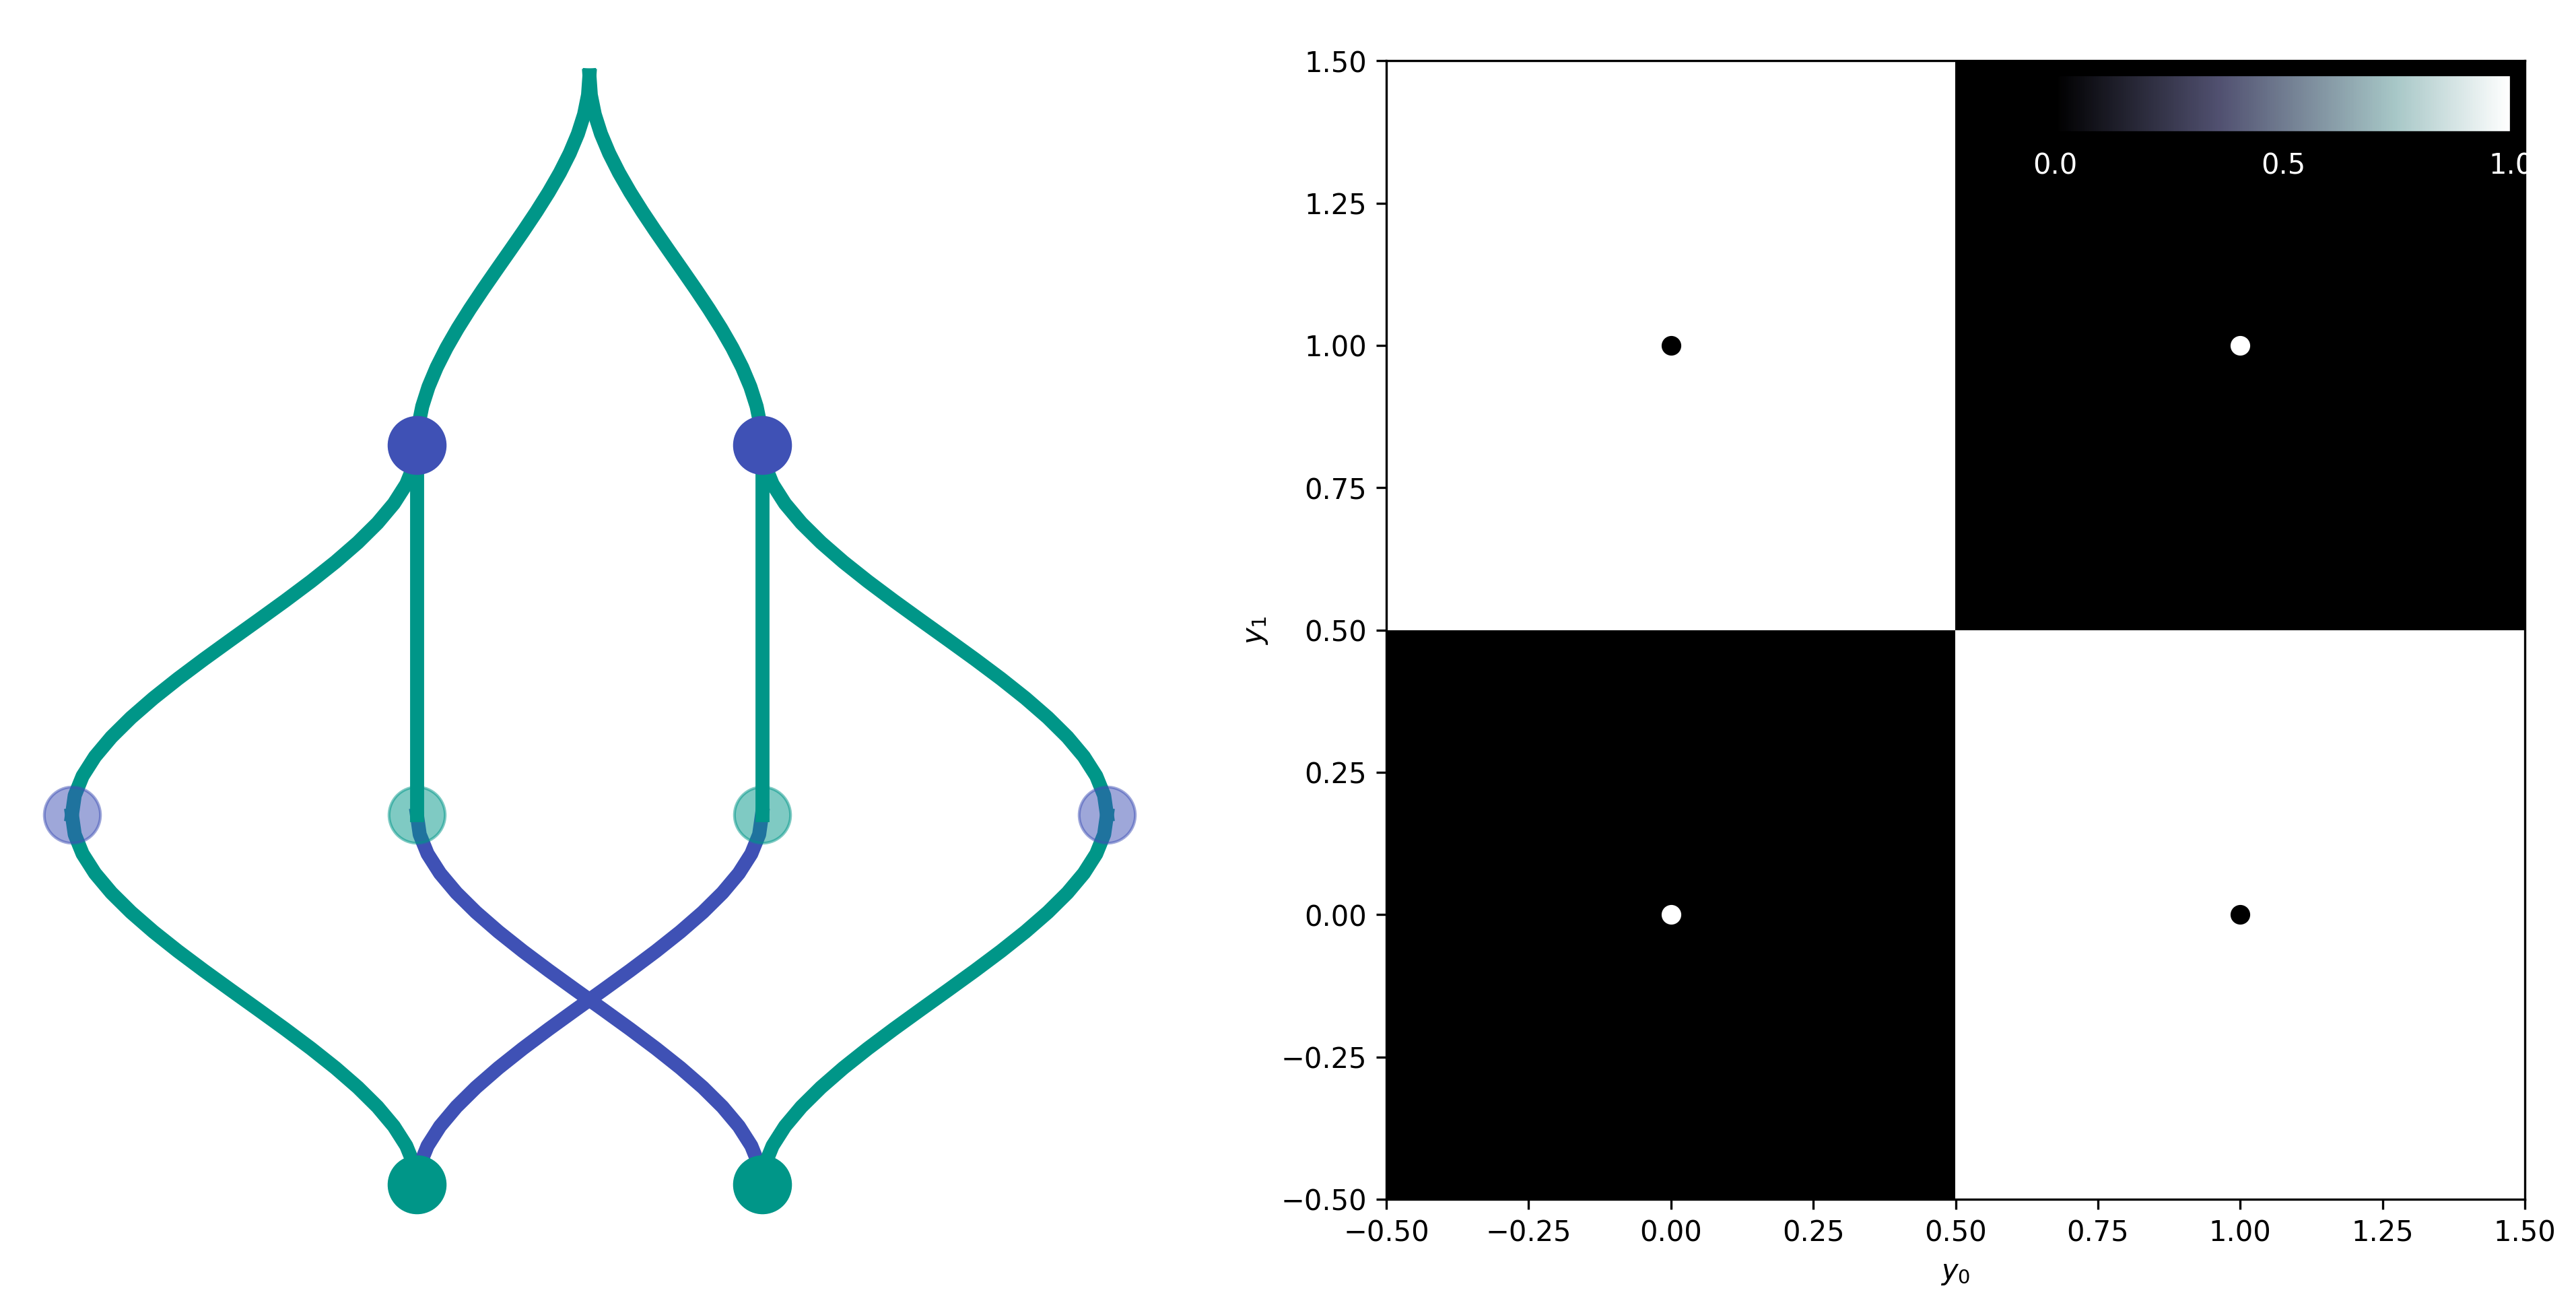

In [120]:
f, a = nn.visualize(
    y0_range=[-0.5, 1.5],
    y1_range=[-0.5, 1.5],
    colormap='bone',
    display=False
)

a[1].scatter([0, 1], [0, 1], c='white')
a[1].scatter([1, 0], [0, 1], c='black')
plt.show()

### Task 2

> Implement a network that approximately computes `XOR`, with just 1 hidden layer.

Using as base code the one provided un the previous task, we create our network with 1 hidden layer.

In [0]:
# We define weights
weights = [
    [
        [-1.0, -1.0], # Weights of 2 input neurons for 1st hidden neuron
        [1.0, 1.0],   # Weights of 2 input neurons for 2nd hidden neuron
    ],                
    [ 
        [1.0, 1.0]    # Weights of 2 hidden neurons for output
    ]
]

# We define biases
biases = [
    [1.5, -0.5], # Biases of 2 hidden neurons
    [-1.5]       # Bias for output neuron
]

# We define activations
activations = [
    'step', # Activation for hidden layer
    'step'  # activation for output layer
]

In [0]:
nn = NeuralNet(weights, biases, activations)

If we apply the network to the inputs (0, 0) and (1, 1) it should return 0, and if we apply the network to (1, 0) and (0, 1) it should return 1.

Let's verify.

In [10]:
# Inputs (0, 0), (0, 1), (1, 0), (1, 1)
y_in = [(0, 0), (0, 1), (1, 0), (1, 1)]

y_out = nn.feedforward(y_in)
print(y_out)

[[0.]
 [1.]
 [1.]
 [0.]]


As we can see, the network solves the problem.

Now let's proceed to visualize the results from the network and the decision boundaries in a plot. We will also add the points (0, 0), (0, 1), (1, 0) and (1, 1) to verify their positions according to the network's output.

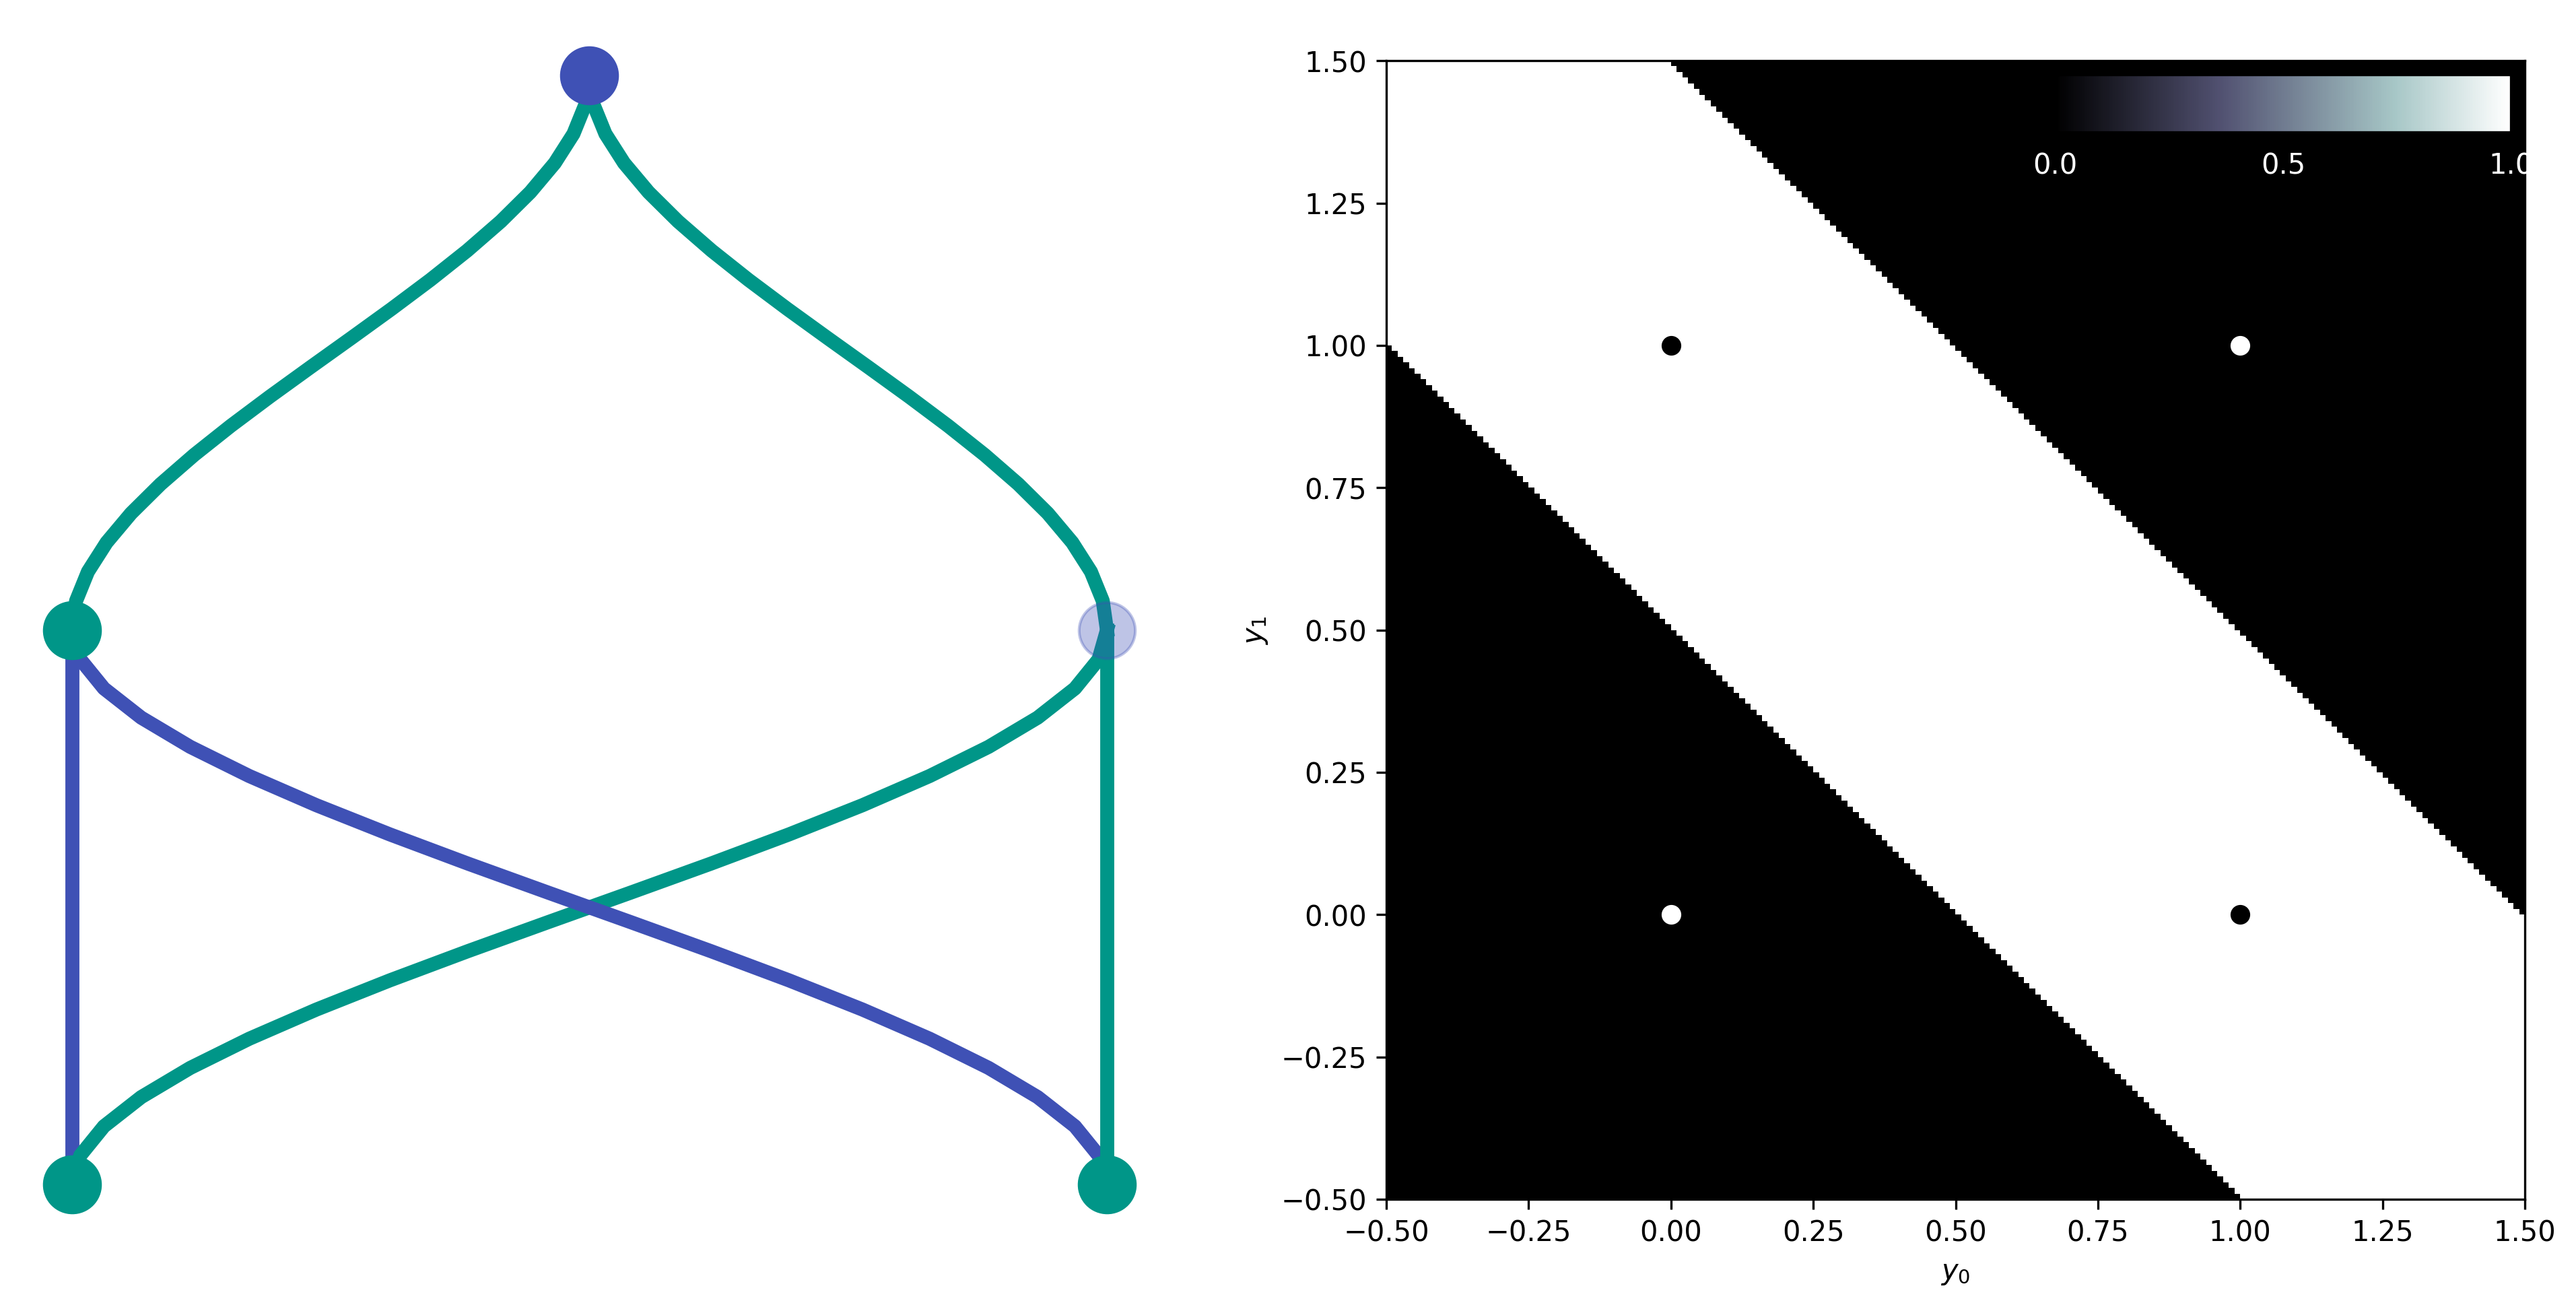

In [11]:
f, a = nn.visualize(
    y0_range=[-0.5, 1.5],
    y1_range=[-0.5, 1.5],
    colormap='bone',
    display=False
)

a[1].scatter([0, 1], [0, 1], c='white')
a[1].scatter([1, 0], [0, 1], c='black')
plt.show()

### Task 3

> Visualize the results of intermediate layers in a multi-layer randomly initialized NN (meaning: take a fixed randomly initialized multi-layer network, and then throw away the layers above layer $n$; and directly connect layer $n$ to the output layer; see how results change when you vary $n$.


### Task 4

> What happens when you change the spread of the random weights? Smart weight initialization is an important point for NN training.

### Task 5

> Explore cases of curve fitting where there are several (non-equivalent) local minima. Is sampling noise helpful (i.e. the noise that comes about because of the small number of  $𝑥$  samples)?